In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df

,X1,X2,y
0,61.2,-1.826351,1
1,51.1,-1.980502,1
2,152.1,-1.870803,0
3,54.7,-1.027222,1
4,31.5,-1.731606,1
...,...,...,...
246,101.6,-1.324259,1
247,99.1,-1.241329,1
248,92.9,-1.487220,0
249,98.0,-1.660731,1


In [11]:
df.isnull().sum()

X1    0
X2    0
y     0
dtype: int64

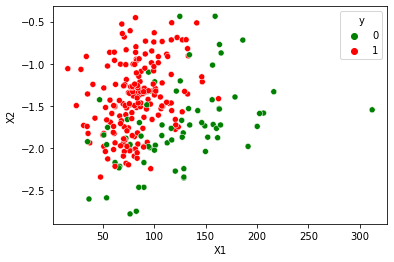

In [12]:
sn.scatterplot(x="X1", y="X2",hue="y",data=df,palette=['green','red']);

In [4]:
def cost_function(X, y, weights):
    scores = np.dot(X, weights)
    h = sigmoid(scores)
    return (-1/len(df)) * sum( (y*np.log(h)) + (1-y)*(np.log(1-h)) )

In [5]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [6]:
def gradient_descent(X, y, learning_rate, nbr_steps):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    weights = np.zeros(X.shape[1])
    m = len(df)
    for step in range(nbr_steps):
        scores = np.dot(X, weights)
        hypothesis = sigmoid(scores)
        output_error_signal = hypothesis - y
        
        gradient = np.dot(X.T, output_error_signal)
        
        weights -= (learning_rate/m) * gradient
        
    return weights

In [7]:
weights = gradient_descent(df[['X1', 'X2']], df['y'], 0.001, 350000)
print(weights)

[ 7.47605223 -0.03585006  1.96934281]


# COMPUTE THE COEFFICIENTS

In [8]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression()
mdl.fit(df[['X1','X2']], df['y'])
sklearn_weights = [mdl.intercept_[0], mdl.coef_[0,0], mdl.coef_[0,1]]
print(sklearn_weights)

[9.095237182569118, -0.0444268541983659, 2.4126607055111795]


In [9]:
x1 = (-weights[0] - weights[2]*df.iloc[0,1])/weights[1]
x2 = (-weights[0] - weights[2]*df.iloc[1,1])/weights[1]

x11 = (-sklearn_weights[0] - sklearn_weights[2]*df.iloc[0,1])/sklearn_weights[1]
x22 = (-sklearn_weights[0] - sklearn_weights[2]*df.iloc[1,1])/sklearn_weights[1]

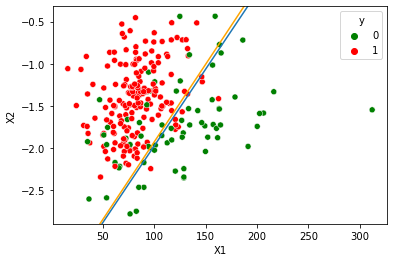

In [10]:
sn.scatterplot(x="X1", y="X2",hue="y",data=df,palette=['green','red']);

plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[1,1]))

plt.axline((x11, df.iloc[0,1]), (x22, df.iloc[1,1]), color = "orange")